In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from dateutil.relativedelta import relativedelta
from scipy.stats.stats import pearsonr
import scipy

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
df = pd.read_csv('csv/martinus_sk.csv', sep=',')
df_db = pd.read_csv('csv/martinus_db.csv', sep=',')
print (len(df))
print (len(df_db))

474
3295


In [72]:
print (df.columns)
print (df_db.columns)

Index(['code', 'date', 'comments', 'likes', 'caption', 'image'], dtype='object')
Index(['title', 'price'], dtype='object')


In [73]:
df = df.drop('code', 1)
df = df.drop('image', 1)
df = df.drop_duplicates()
df_db = df_db.drop_duplicates()
df.reset_index(inplace=True)
df.head(11)

,index,date,comments,likes,caption
0,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,1,1476964919,5,236,"Naša Borka, ktorú môžete stretnúť v kníhkupect..."
2,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
3,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,4,1476426933,0,303,Aj vy už máte nachystanú kôpku kníh na víkend?...
5,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
6,6,1476201092,2,340,Nové číslo magazínu O knihách rozdávame k náku...
7,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
8,8,1475907900,5,419,Dobré ránko! Víkend si zaslúži pomalé raňajky ...
9,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...


In [74]:
title = df_db["title"]
title = title.str.strip().str.lower().str.replace(" ", "")

In [75]:
import string
exclude = set(string.punctuation)
def remove_punctuation(title):
    title = ''.join(ch for ch in title if ch not in exclude)
    return title
    
title = title.apply(remove_punctuation)

In [76]:
import unicodedata
def remove_accents(title):
    nfkd_form = unicodedata.normalize('NFKD', title)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

title = title.apply(remove_accents)

In [77]:
title = title.str.decode("utf-8")
df_db["edited_title"] = title
df_db.head(11)

,title,price,edited_title
0,Domácí krabičková dieta 1 - 3 - BOX,"26,92 €",domacikrabickovadieta13box
1,Divá Bára / Dobrý člověk,"7,76 €",divabaradobryclovek
2,Doplňkový odpor v tréninku rychlostních schopn...,"11,66 €",doplnkovyodporvtreninkurychlostnichschopnosti
3,Myslivecké příběhy z hor,"10,49 €",mysliveckepribehyzhor
4,Ráchel a Lars (Obrázkový deník dvojího odcházení),"17,58 €",rachelalarsobrazkovydenikdvojihoodchazeni
5,Winx club - Omalovánky A4,"2,35 €",winxclubomalovankya4
6,Ztraceno ve vlnách,"12,44 €",ztracenovevlnach
7,"Support (Ako vybudovať úspešný biznis, aj keď ...","11,49 €",supportakovybudovatuspesnybiznisajkedrobitejed...
8,Trhlina,"10,32 €",trhlina
9,Smrť na druhom brehu,"10,36 €",smrtnadruhombrehu


In [ ]:
results = pd.Series(df["caption"]).str.extractall('(?P<hashtag>[#]+)(\w+)')
results

In [ ]:
results1 = results.xs(5, level="match")
results1

In [80]:
all_hastags = []

for i in range(0,10):
    results.xs(i, level="match")
    all_hastags.append(results[1].tolist())
    
print (len(all_hastags[0]))

2380


In [ ]:
b = df_db["edited_title"].tolist()
results.reset_index(inplace=True)  

final = []
for bd in b:
    try:
        if bd in all_hastags[0]:
            final.append(bd)
    except:
        pass


df_new = results[results[1].isin(final) == True]
print (len(df_new))

In [82]:
merged_inner = pd.merge(left=df_new,right=df, left_on='level_0', right_on='index')
merged_inner.head(11)

,level_0,match,hashtag,1,index,date,comments,likes,caption
0,0,9,#,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,2,3,#,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
2,3,10,#,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
3,3,11,#,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,5,5,#,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
5,7,5,#,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
6,9,3,#,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...
7,13,14,#,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...
8,16,5,#,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...
9,29,5,#,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...


In [83]:
merged_inner = merged_inner.drop('match', axis = 1)
merged_inner = merged_inner.drop('hashtag', axis = 1)
merged_inner = merged_inner.drop('level_0', axis = 1)
merged_inner.head(11)

,1,index,date,comments,likes,caption
0,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...
1,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a..."
2,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
3,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...
4,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor..."
5,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...
6,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...
7,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...
8,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...
9,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...


In [84]:
merged_left = pd.merge(left=merged_inner,right=df_db, how='inner', left_on=1, right_on='edited_title')
merged_left = merged_left.drop_duplicates([1, 'edited_title'])
merged_left.head(11)

,1,index,date,comments,likes,caption,title,price,edited_title
0,sova,0,1477043403,4,106,Na našom Youtube kanále nájdete najnovší diel ...,Sova,"12,72 €",sova
1,vludskejkozi,2,1476783974,0,665,"K tomuto počasiu sa hodia skôr teplé nápoje, a...",V ľudskej koži,"11,01 €",vludskejkozi
2,niesomziadnababovka,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...,Nie som žiadna bábovka,"13,52 €",niesomziadnababovka
3,pribehnovehopriezviska,3,1476534655,3,216,Aký máte zatiaľ víkend? Ak hľadáte inšpiráciu ...,Príbeh nového priezviska,"13,80 €",pribehnovehopriezviska
4,ziskajsijejpriazen,5,1476344818,12,400,"Aha, čo nám práve dorazilo na sklad. Nový Geor...",Získaj si jej priazeň,"10,59 €",ziskajsijejpriazen
5,dankaajanka,7,1476095536,8,326,Waw! Naše kníhkupectvo v Cubicone sa objavilo ...,Danka a Janka,"5,52 €",dankaajanka
6,dievcavovlaku,9,1475573558,6,413,Toto daždivé jesenné počasie si pýta teplý šál...,Dievča vo vlaku,"10,64 €",dievcavovlaku
8,harrypotter17box,13,1475142446,4,336,Kto si ešte dnes do 15:00 predobjedná nového H...,Harry Potter 1 - 7 (box),"53,31 €",harrypotter17box
10,najkrajsieslovenskerozpravky,16,1474533750,4,225,Aká je vaša obľúbená jesenná kniha? Čo takto f...,Najkrajšie slovenské rozprávky,"17,79 €",najkrajsieslovenskerozpravky
11,peklojeotvorene,29,1472036874,4,156,Druhý detektívny román od vynikajúceho autora ...,Peklo je otvorené,"12,42 €",peklojeotvorene


In [85]:
merged_left = merged_left.drop([1, 'caption', 'edited_title'], axis=1)
merged_left.head(11)

,index,date,comments,likes,title,price
0,0,1477043403,4,106,Sova,"12,72 €"
1,2,1476783974,0,665,V ľudskej koži,"11,01 €"
2,3,1476534655,3,216,Nie som žiadna bábovka,"13,52 €"
3,3,1476534655,3,216,Príbeh nového priezviska,"13,80 €"
4,5,1476344818,12,400,Získaj si jej priazeň,"10,59 €"
5,7,1476095536,8,326,Danka a Janka,"5,52 €"
6,9,1475573558,6,413,Dievča vo vlaku,"10,64 €"
8,13,1475142446,4,336,Harry Potter 1 - 7 (box),"53,31 €"
10,16,1474533750,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
11,29,1472036874,4,156,Peklo je otvorené,"12,42 €"


In [86]:
import datetime 
def convert_date(date):
    new_date = datetime.datetime.fromtimestamp(int(date))
    return new_date
date = merged_left["date"]
date = date.apply(convert_date)
merged_left["date"] = date
merged_left.head(11)

,index,date,comments,likes,title,price
0,0,2016-10-21 11:50:03,4,106,Sova,"12,72 €"
1,2,2016-10-18 11:46:14,0,665,V ľudskej koži,"11,01 €"
2,3,2016-10-15 14:30:55,3,216,Nie som žiadna bábovka,"13,52 €"
3,3,2016-10-15 14:30:55,3,216,Príbeh nového priezviska,"13,80 €"
4,5,2016-10-13 09:46:58,12,400,Získaj si jej priazeň,"10,59 €"
5,7,2016-10-10 12:32:16,8,326,Danka a Janka,"5,52 €"
6,9,2016-10-04 11:32:38,6,413,Dievča vo vlaku,"10,64 €"
8,13,2016-09-29 11:47:26,4,336,Harry Potter 1 - 7 (box),"53,31 €"
10,16,2016-09-22 10:42:30,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
11,29,2016-08-24 13:07:54,4,156,Peklo je otvorené,"12,42 €"


In [87]:
merged_left = merged_left.sort_values(by='likes', ascending=0)
merged_left.head(11)

,index,date,comments,likes,title,price
1,2,2016-10-18 11:46:14,0,665,V ľudskej koži,"11,01 €"
14,161,2016-01-29 19:17:10,7,467,Prezident,"10,32 €"
6,9,2016-10-04 11:32:38,6,413,Dievča vo vlaku,"10,64 €"
4,5,2016-10-13 09:46:58,12,400,Získaj si jej priazeň,"10,59 €"
13,76,2016-06-16 13:25:13,3,353,Nežná fatamorgána,"11,53 €"
8,13,2016-09-29 11:47:26,4,336,Harry Potter 1 - 7 (box),"53,31 €"
5,7,2016-10-10 12:32:16,8,326,Danka a Janka,"5,52 €"
10,16,2016-09-22 10:42:30,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
2,3,2016-10-15 14:30:55,3,216,Nie som žiadna bábovka,"13,52 €"
3,3,2016-10-15 14:30:55,3,216,Príbeh nového priezviska,"13,80 €"


In [88]:
merged_left.to_csv('csv/final_dataset.csv')

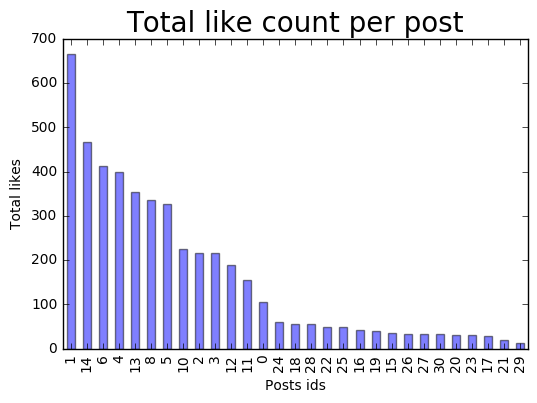

In [90]:
merged_left["likes"].plot(kind="bar", alpha=0.5)
plt.title("Total like count per post", fontsize=20)
plt.xlabel("Posts ids")
plt.ylabel("Total likes")

In [91]:
df_image = pd.DataFrame(['<img src="instagram.png"/>'], columns = ['Image'])

HTML(df_image.to_html(escape=False))

,Image
0,


In [92]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [93]:
merged_left[['likes','comments']].describe().T

,count,mean,std,min,25%,50%,75%,max
likes,29.00,161.24,171.28,12.00,34.00,56.00,225.00,665.00
comments,29.00,2.86,2.82,0.00,1.00,3.00,4.00,12.00


In [94]:
merged_left['likes'].corr(df['comments'])

0.052801891794442259

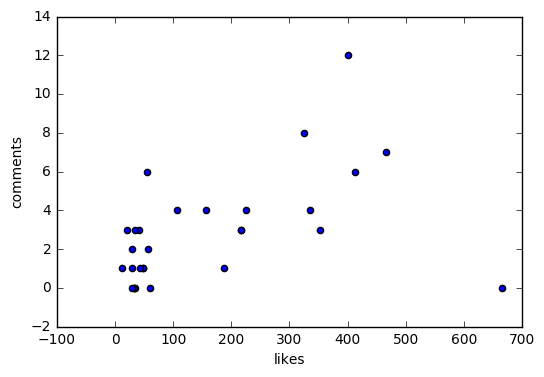

In [95]:
merged_left.plot(kind='scatter', x='likes', y='comments')

In [96]:
two_months = datetime.date.today() - relativedelta(months=+2)
merged_left = merged_left[merged_left["comments"] >= 3]
merged_left = merged_left[merged_left["date"] >= two_months]
merged_left

,index,date,comments,likes,title,price
6,9,2016-10-04 11:32:38,6,413,Dievča vo vlaku,"10,64 €"
4,5,2016-10-13 09:46:58,12,400,Získaj si jej priazeň,"10,59 €"
8,13,2016-09-29 11:47:26,4,336,Harry Potter 1 - 7 (box),"53,31 €"
5,7,2016-10-10 12:32:16,8,326,Danka a Janka,"5,52 €"
10,16,2016-09-22 10:42:30,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
2,3,2016-10-15 14:30:55,3,216,Nie som žiadna bábovka,"13,52 €"
3,3,2016-10-15 14:30:55,3,216,Príbeh nového priezviska,"13,80 €"
0,0,2016-10-21 11:50:03,4,106,Sova,"12,72 €"


In [97]:
merged_left = merged_left.sort_values(by=['comments'], ascending=0)
merged_left

,index,date,comments,likes,title,price
4,5,2016-10-13 09:46:58,12,400,Získaj si jej priazeň,"10,59 €"
5,7,2016-10-10 12:32:16,8,326,Danka a Janka,"5,52 €"
6,9,2016-10-04 11:32:38,6,413,Dievča vo vlaku,"10,64 €"
8,13,2016-09-29 11:47:26,4,336,Harry Potter 1 - 7 (box),"53,31 €"
10,16,2016-09-22 10:42:30,4,225,Najkrajšie slovenské rozprávky,"17,79 €"
0,0,2016-10-21 11:50:03,4,106,Sova,"12,72 €"
2,3,2016-10-15 14:30:55,3,216,Nie som žiadna bábovka,"13,52 €"
3,3,2016-10-15 14:30:55,3,216,Príbeh nového priezviska,"13,80 €"


In [98]:
df_image = pd.DataFrame(['<img src="all_likes.png"/>'], columns = ['Image'])

HTML(df_image.to_html(escape=False))

,Image
0,


In [99]:
df_users = pd.read_csv('csv/users.csv', sep=',', low_memory=False)
df_users.head(11)

,username,index_id
0,knihypaseka,16
1,gitagitka,13
2,crazyboy77777,161
3,knihypaseka,7
4,knihypaseka,454
5,katka3899,161
6,kristina.synakova1,13
7,essentials.daisydrop,29
8,annaprehodova,161
9,patrikm18,5


In [100]:
users = pd.merge(left=merged_left,right=df_users, how='inner', left_on='index', right_on='index_id')
users = users.drop(['likes', 'index_id'], axis=1)
users = users.drop_duplicates(['title', 'username'])
users.head(20)

,index,date,comments,title,price,username
0,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",patrikm18
1,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",janka_tomanova
2,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",kristina_kali
3,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",henta__tam
5,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",dasti96
6,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",knihypaseka
7,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",alenkakordiak
8,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",kristina_kali
9,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",ziarivy
11,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",kristina.synakova1


In [101]:
users["cluster"] = users["index"]
users.head(11)

,index,date,comments,title,price,username,cluster
0,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",patrikm18,5
1,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",janka_tomanova,5
2,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",kristina_kali,5
3,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",henta__tam,5
5,5,2016-10-13 09:46:58,12,Získaj si jej priazeň,"10,59 €",dasti96,5
6,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",knihypaseka,7
7,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",alenkakordiak,7
8,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",kristina_kali,7
9,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",ziarivy,7
11,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",kristina.synakova1,7


In [102]:
cluster_e = users[users["username"] == "ziarivy"]
cluster_e

,index,date,comments,title,price,username,cluster
9,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",ziarivy,7
16,9,2016-10-04 11:32:38,6,Dievča vo vlaku,"10,64 €",ziarivy,9
27,0,2016-10-21 11:50:03,4,Sova,"12,72 €",ziarivy,0


In [103]:
cluster_u = users[(users["cluster"] == 9) & (users["username"] != "ziarivy")]
cluster_u

,index,date,comments,title,price,username,cluster
14,9,2016-10-04 11:32:38,6,Dievča vo vlaku,"10,64 €",knihypaseka,9
15,9,2016-10-04 11:32:38,6,Dievča vo vlaku,"10,64 €",zemancik.radoslav,9


In [104]:
df_image = pd.DataFrame(['<img src="dievca_vo_vlaku.png"/>'], columns = ['Image'])

HTML(df_image.to_html(escape=False))

,Image
0,


In [105]:
cluster_r = users[users.username.isin(cluster_u["username"])]
cluster_r

,index,date,comments,title,price,username,cluster
6,7,2016-10-10 12:32:16,8,Danka a Janka,"5,52 €",knihypaseka,7
14,9,2016-10-04 11:32:38,6,Dievča vo vlaku,"10,64 €",knihypaseka,9
15,9,2016-10-04 11:32:38,6,Dievča vo vlaku,"10,64 €",zemancik.radoslav,9
21,16,2016-09-22 10:42:30,4,Najkrajšie slovenské rozprávky,"17,79 €",knihypaseka,16


In [106]:
cluster_r = cluster_r[~cluster_r.cluster.isin(cluster_e["cluster"])]
cluster_r

,index,date,comments,title,price,username,cluster
21,16,2016-09-22 10:42:30,4,Najkrajšie slovenské rozprávky,"17,79 €",knihypaseka,16


In [108]:
def get_book_comments(username):
    comments = users[users.username == username]
    return comments["comments"].get_values()

In [109]:
y = scipy.array(get_book_comments("zemancik.radoslav"))
x = scipy.array(get_book_comments("knihypaseka"))
z = scipy.array(get_book_comments("ziarivy"))

print (len(x))
print (len(y))

3
1


In [112]:
df_image = pd.DataFrame(['<img src="final_book.png"/>'], columns = ['Image'])

HTML(df_image.to_html(escape=False))

,Image
0,
